<a href="https://colab.research.google.com/github/2303A52425/AIML/blob/main/AIML_PROJECT_NO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import pair_confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score




In [ ]:
df=pd.read_csv("/content/Liver_disease_data.csv")
df.head()
df.shape
df.size
df.count()
df['Diagnosis'].value_counts()


,count
Diagnosis,
1,936
0,764


<Axes: xlabel='Gender', ylabel='Age'>

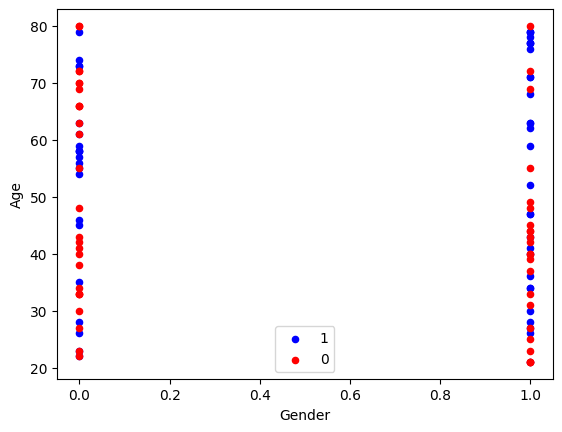

In [ ]:
first_df = df[df['Diagnosis']==1][0:50]
second_df =df[df['Diagnosis']==0][0:50]
axes = first_df.plot(kind='scatter',x='Gender',y='Age',color='blue',label='1')
second_df.plot(kind='scatter',x='Gender',y='Age',color='red',label='0',ax=axes)

In [ ]:
df.dtypes

,0
Age,int64
Gender,int64
BMI,float64
AlcoholConsumption,float64
Smoking,int64
GeneticRisk,int64
PhysicalActivity,float64
Diabetes,int64
Hypertension,int64
LiverFunctionTest,float64


In [ ]:
df.columns
feature=df[['Age','Gender','BMI','AlcoholConsumption','Smoking','GeneticRisk','PhysicalActivity','Diabetes','Hypertension','LiverFunctionTest']]
X=np.asarray(feature)
Y=np.asarray(df['Diagnosis'])
X[0:5]


array([[58.        ,  0.        , 35.85758415, 17.27282843,  0.        ,
         1.        ,  0.65894018,  0.        ,  0.        , 42.73424003],
       [71.        ,  1.        , 30.73247015,  2.20126568,  0.        ,
         1.        ,  1.67055669,  1.        ,  0.        , 67.3098216 ],
       [48.        ,  0.        , 19.97140694, 18.50094351,  0.        ,
         0.        ,  9.92830825,  0.        ,  0.        , 63.73895584],
       [34.        ,  1.        , 16.615417  , 12.6328703 ,  0.        ,
         0.        ,  5.63012943,  0.        ,  0.        , 64.55587349],
       [62.        ,  1.        , 16.06583023,  1.08781497,  0.        ,
         1.        ,  3.56621799,  1.        ,  0.        , 77.86868894]])

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape

(1360, 10)

In [ ]:

clf=svm.SVC(kernel='linear',gamma='auto',C=2)
clf.fit(x_train,y_train)
Y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,Y_pred)
print("Accuracy of SVM model is:",acc)


Accuracy of SVM model is: 0.8058823529411765


In [ ]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       162
           1       0.79      0.85      0.82       178

    accuracy                           0.81       340
   macro avg       0.81      0.80      0.80       340
weighted avg       0.81      0.81      0.81       340



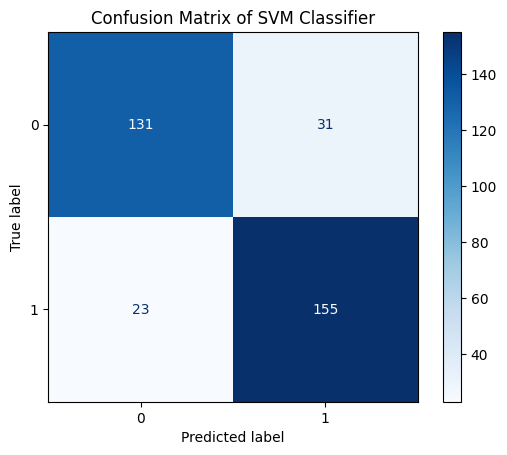

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Liver_disease_data.csv")
df = df.dropna()
label_encoders = {}
categorical_columns = ['Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of SVM Classifier")
plt.show()


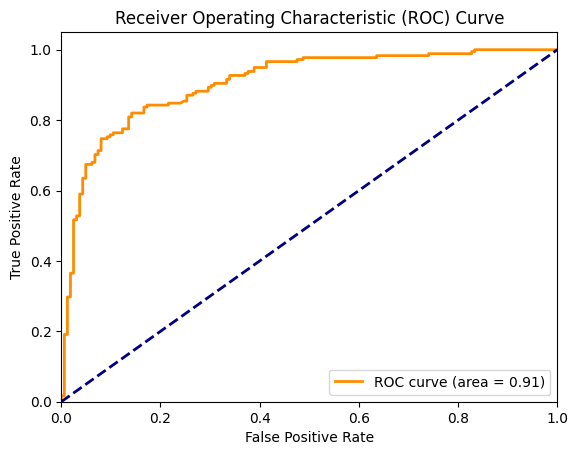

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Liver_disease_data.csv")
df = df.dropna()
label_encoders = {}
categorical_columns = ['Gender']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_proba = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
df.shape

(1700, 11)

In [ ]:
df["Diagnosis"].value_counts()

,count
Diagnosis,
1,936
0,764


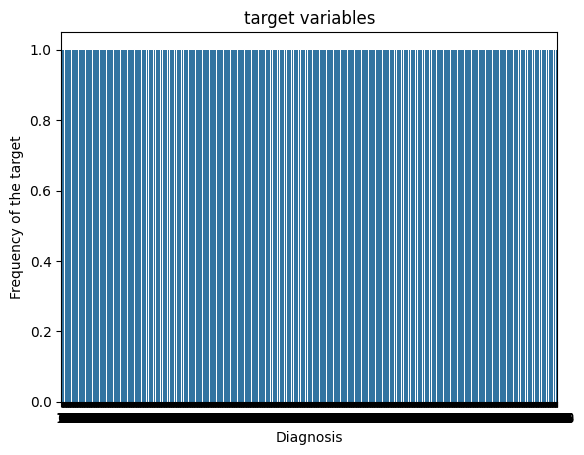

In [ ]:
sns.countplot(df["Diagnosis"])
plt.xlabel("Diagnosis")
plt.ylabel("Frequency of the target")
plt.title("target variables")
plt.show()

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.shape

(1700, 10)

In [ ]:
y.shape

(1700,)

In [ ]:
y_train.shape

(1360,)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape


(1360, 10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test)

0.7735294117647059

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[162,   0],
       [178,   0]])

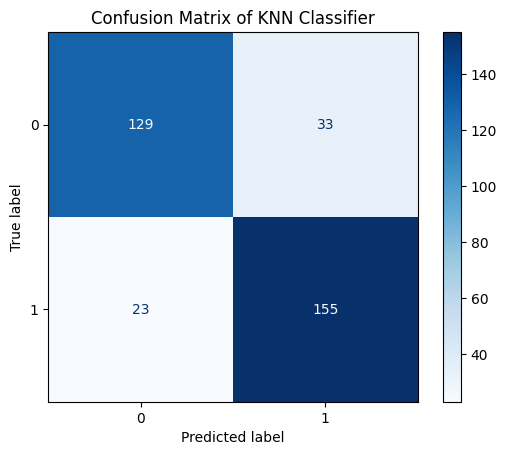

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Liver_disease_data.csv")
df = df.dropna()
label_encoders = {}
categorical_columns = ['Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of KNN Classifier")
plt.show()


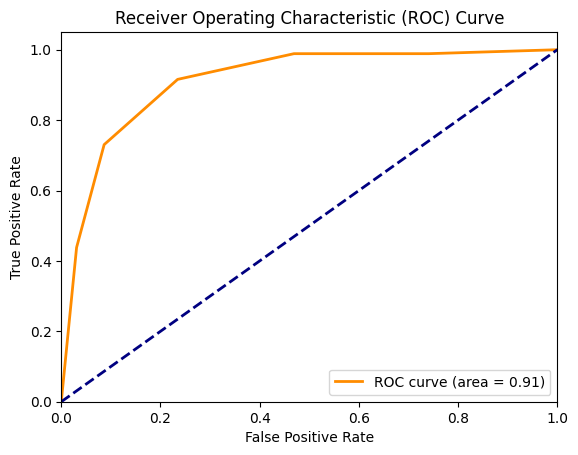

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Liver_disease_data.csv")

df = df.dropna()

label_encoders = {}
categorical_columns = ['Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_proba = knn_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_split=9,random_state=42)
clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=42)

In [ ]:
clf.feature_importances_

array([0.09204736, 0.06378356, 0.11052445, 0.21166206, 0.05154377,
       0.07243332, 0.07596627, 0.        , 0.04966138, 0.27237784])

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)
cn

array([[162,   0],
       [176,   2]])

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("ACCURACY OF DECISION TREE MODEL IS:",accuracy)

ACCURACY OF DECISION TREE MODEL IS: 0.8558823529411764


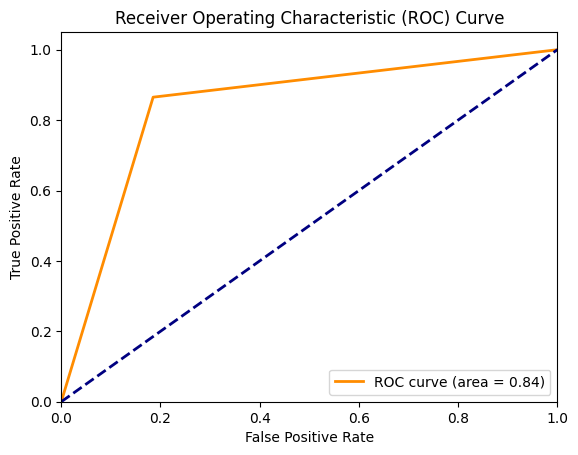

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Liver_disease_data.csv")
df = df.dropna()
label_encoders = {}
categorical_columns = ['Gender']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


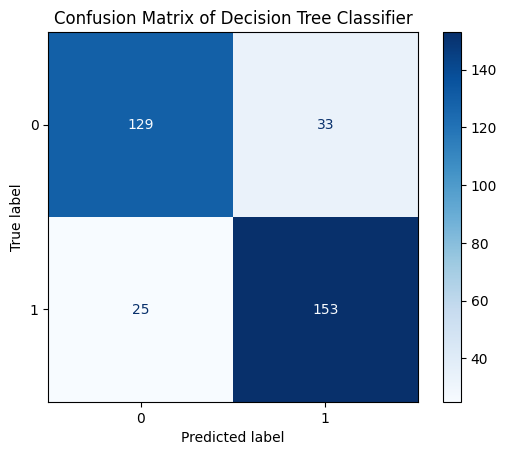

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Liver_disease_data.csv")
df = df.dropna()
label_encoders = {}
categorical_columns = ['Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()


In [ ]:
scores=cross_val_score(clf,X,y,cv=5)
scores

array([0.82647059, 0.85882353, 0.90882353, 0.87058824, 0.73529412])

In [ ]:
X = df.iloc[:,: -1]
y = df.iloc[:, -1]

In [ ]:
X.shape

(1700, 10)

In [ ]:
y.shape

(1700,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(1360, 10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [ ]:
clf.feature_importances_

array([0.09337288, 0.04589926, 0.1015287 , 0.2770282 , 0.05284643,
       0.04556723, 0.0800133 , 0.01362931, 0.03483748, 0.25527721])

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[135,  27],
       [ 12, 166]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("ACCURACY OF RANDOM FOREST MODEL IS:",accuracy)

ACCURACY OF RANDOM FOREST MODEL IS: 0.8852941176470588


In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X_train,y_train,cv=5)
scores

array([0.86764706, 0.86397059, 0.87867647, 0.90073529, 0.88602941])

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       162
           1       0.86      0.93      0.89       178

    accuracy                           0.89       340
   macro avg       0.89      0.88      0.88       340
weighted avg       0.89      0.89      0.88       340



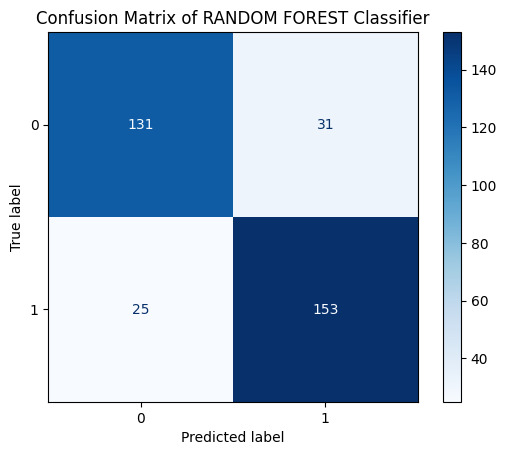

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Liver_disease_data.csv")
df = df.dropna()
label_encoders = {}
categorical_columns = ['Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of RANDOM FOREST Classifier")
plt.show()


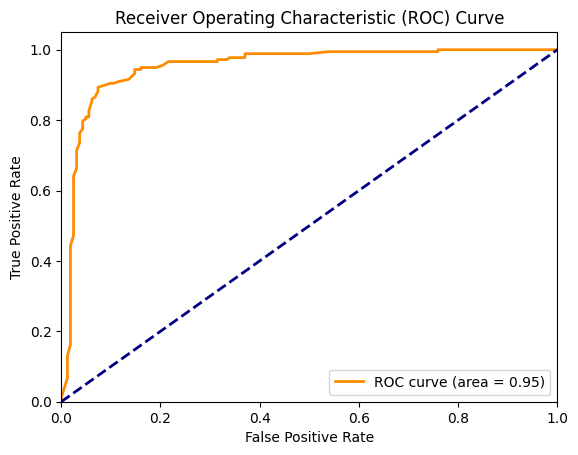

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Liver_disease_data.csv")
df = df.dropna()
label_encoders = {}
categorical_columns = ['Gender']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


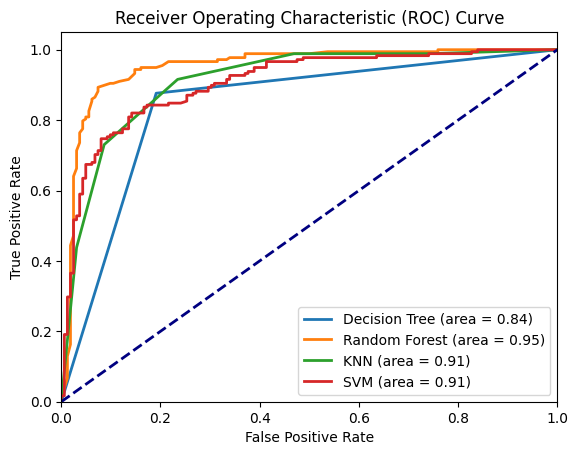

           Model   ROC AUC
0  Decision Tree  0.842523
1  Random Forest  0.951398
2            KNN  0.910875
3            SVM  0.905431


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Liver_disease_data.csv")
df = df.dropna()
label_encoders = {}
categorical_columns = ['Gender']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True)
}

plt.figure()
model_results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')
    model_results.append([model_name, roc_auc])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
comparison_table = pd.DataFrame(model_results, columns=["Model", "ROC AUC"])
print(comparison_table)
